# Hoti

In [4]:
from pylab import *
import matplotlib.pylab as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib import rc


font = {'family' : 'serif',
        'serif': ['Computer Modern'],
        'weight' : 'bold',
        'size'   : 28}

rc('font', **font)
rc('text', usetex=True)

In [5]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

if not os.path.exists("images/video_images"):
    os.mkdir("images/video_images")
    
if not os.path.exists("images/video_images2"):
    os.mkdir("images/video_images2")

if not os.path.exists("images/video_images3"):
    os.mkdir("images/video_images3")

In [37]:
name_array = "array_4x4.xyz"
epsi = 0.00
nval = 1.0
val  = 1
cal_value = True

In [38]:
Color_array = ['rgb(30, 150, 0)',
              'rgb(63, 161, 0)',
              'rgb(89, 172, 0)',
              'rgb(113, 182, 0)',
              'rgb(136, 193, 0)',
              'rgb(159, 203, 0)',
              'rgb(183, 213, 0)',
              'rgb(206, 223, 0)',
              'rgb(230, 233, 0)',
              'rgb(255, 242, 0)',
              'rgb(255, 225, 0)',
               'rgb(255, 208, 0)',
               'rgb(255, 190, 0)',
               'rgb(255, 172, 0)',
               'rgb(255, 153, 0)',
               'rgb(255, 133, 0)',
               'rgb(255, 112, 0)',
               'rgb(255, 88, 0)',
               'rgb(255, 59, 0)',
               'rgb(255, 0, 0)']

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll


def colorline(
        x, y, axis, z=None ,cmap='copper',
        linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    # to check for numerical input -- this is a hack
    if not hasattr(z, "__iter__"):
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap,
                              linewidth=linewidth, alpha=alpha)

    axis.add_collection(lc)

    return lc

def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments



# Modelo finito 

In [40]:
x,y,f,d = np.loadtxt(name_array,usecols=(1,2,4,5),skiprows=2,unpack=True)
ind = np.argsort(f)
#x,y,f = xd[ind], yd[ind], fd[ind]

In [49]:
x

array([0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3., 0., 1., 2., 3.])

In [42]:
r = 1.1
Dic = {}
natoms = int( len(x) )
for n in range(natoms):
    a = sqrt( (x[n]-x)*(x[n]-x) + (y[n]-y)*(y[n]-y) ) < r 
    vecinos = [i for i, x in enumerate(a) if x and i!=n]
    Dic[n] = vecinos

In [43]:
r = max(x) - 0.1
Dic_furtherx = {}
Dic_furthery = {}
for n in range(natoms):
    a = sqrt( (x[n]-x)*(x[n]-x) + (y[n]-y)*(y[n]-y) ) > r
    vecinosx = [i for i, j in enumerate(a) if j and (x[n]==x[i])]
    vecinosy = [i for i, j in enumerate(a) if j and (y[n]==y[i])]
    Dic_furtherx[n] = vecinosx
    Dic_furthery[n] = vecinosy

In [44]:
#random matrix
M_rand = rand(natoms,natoms)
M_rand = (M_rand + M_rand.T)/2
M_mins = diag(ones(natoms))

M_rand = M_rand - M_mins*M_rand

In [54]:
def Hoti_Hamiltonian(γ, λ, ϵ=epsi,δ=1e-3, natoms=natoms, M_rand=M_rand, conection=False,cn='x'):
    H = np.zeros((natoms,natoms), dtype = 'complex')
    Hop = {}
    a = exp(-1J*pi)
    
    for n in Dic.keys():
        vecinos = Dic[n]
        hop = []
        for v in vecinos:
            f0 = f[n]
            f1 = f[v]
            
            if f0 == f1:
                fase = γ
            else: 
                fase = λ
            
            H[n,v] = fase 
            H[v,n] = fase 
            
            
            hop.append(fase)
        Hop[n] = hop

    f0 = 0
    f1 = 0
    fase = 1
    for n in Dic.keys():
        vecinos = Dic[n]
        for v in vecinos:
            posx     = x[n]
            posy     = y[n]
            f0       = f[n]
            f1       = f[v] 
            if f0 == f1:
                fase = γ
            else: 
                fase = λ

            #if ( posx%2==0 and posy%2==0  ):
             #   if ( x[v] > x[n] ):
             #       H[n,v] = a*fase 
              #      H[v,n] = a*fase 
            #elif(posx%2==1 and posy%2==1):
             #   if ( x[v] > x[n] ):
              #      H[n,v] = a*fase 
               #     H[v,n] = a*fase 
            #else:
             #   pass
                
                
            if ( posy%2==0  ):
                  if ( x[v] > x[n] ):
                    H[n,v] = a*fase 
                    H[v,n] = a*fase 
            #elif(posx%2==1 and posy%2==1):
               # if ( x[v] > x[n] ):
              #      H[n,v] = a*fase 
             #       H[v,n] = a*fase 
            else:
                pass
    
    if conection : 
    
        if cn == 'y':

            for n in Dic_furtherx.keys():
                vecinos = Dic_furtherx[n]
                for v in vecinos:
                    posx   = x[n]
                    posy   = y[n]
                    fase   = λ
                    H[n,v] = fase 
                    H[v,n] = fase 

                    if(posy%2==0):
                        if ( x[v] < x[n] ):
                            H[n,v] = a*fase 
                            H[v,n] = a*fase 
                    else:
                        pass
        if cn == 'x':

            for n in Dic_furthery.keys():
                vecinos = Dic_furthery[n]
                for v in vecinos:
                    posx   = x[n]
                    posy   = y[n]
                    fase   = λ
                    H[n,v] = fase 
                    H[v,n] = fase 

                    if(posy%2==0):
                        if ( x[v] < x[n] ):
                            H[n,v] = a*fase 
                            H[v,n] = a*fase 
                    else:
                        pass
                    
            
                
    H_delta = δ*array(d)
    H_delta = diag(resize(H_delta,natoms), k=0)
    #print(H_delta)
    if ϵ > 0.0:
        H_rand = H * ϵ * M_rand 
        return H + H_rand + H_delta
    else:    
        return H + H_delta
    #print(H)

In [55]:
H0 = Hoti_Hamiltonian(1.0, 5.0,conection=True, cn='x')
H1 = Hoti_Hamiltonian(1.0, 5.0, conection=True, cn='y')
H2 = Hoti_Hamiltonian(5.0, 1.0)#, conection=True)

np.savetxt('halmitonian0.txt',H0)
np.savetxt('halmitonian1.txt',H1)
np.savetxt('halmitonian2.txt',H2)

In [56]:
Ek0, U0 = eigh(H0)
Ek0 = np.real(Ek0)

Ek1, U1 = eigh(H1)
Ek1 = np.real(Ek1)

Ek2, U2 = eigh(H2)
Ek2 = np.real(Ek2)


savetxt("Energias0.txt",Ek0,fmt = '%s', comments = '')
savetxt("Estados0.txt",U0,fmt = '%s', comments = '')

savetxt("Energias1.txt",Ek1,fmt = '%s', comments = '')
savetxt("Estados1.txt",U1,fmt = '%s', comments = '')

savetxt("Energias2.txt",Ek2,fmt = '%s', comments = '')
savetxt("Estados2.txt",U2,fmt = '%s', comments = '')

In [57]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=3,
                    subplot_titles=("γ/λ < 1 ","γ/λ = 1", "γ/λ > 1"))

fig.add_trace(
    go.Heatmap(z=H0.real,coloraxis = "coloraxis"),
    row=1, col=1)

fig.add_trace(
    go.Heatmap(z=H1.real,coloraxis = "coloraxis"),
    row=1, col=2)

fig.add_trace(
    go.Heatmap(z=H2.real,coloraxis = "coloraxis"),
    row=1, col=3)

fig.update_xaxes(showgrid=False,showticklabels=False)
fig.update_yaxes(showgrid=False,showticklabels=False)
fig.update_layout(height=400, width=900, showlegend=False, title_text="", coloraxis={'colorscale':'RdBu'})
fig.show()
fig.write_image("images/Hamiltonian_cero.pdf")

In [22]:
Ek0 = loadtxt("Energias0.txt", unpack=True)
U0  = loadtxt("Estados0.txt", dtype=complex, unpack=True)

Ek1 = loadtxt("Energias1.txt", unpack=True)
U1  = loadtxt("Estados1.txt", dtype=complex, unpack=True)

Ek2 = loadtxt("Energias2.txt", unpack=True)
U2  = loadtxt("Estados2.txt", dtype=complex, unpack=True)

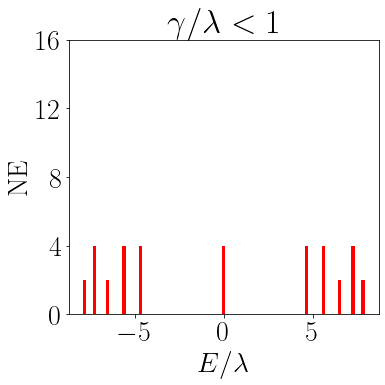

In [23]:
fig, ax = plt.subplots(figsize=(6,6))
bins = 85
ax.hist(Ek0,bins, facecolor='r')
ax.set_ylabel('NE')
ax.set_xlabel('$E/\lambda$')
ax.set_yticks([0,4,8,12,16])
ax.set_title('$\gamma/\lambda < 1$')

plt.tight_layout()
plt.savefig('images/bars_square1.pdf')
plt.savefig('images/bars_square1.png')

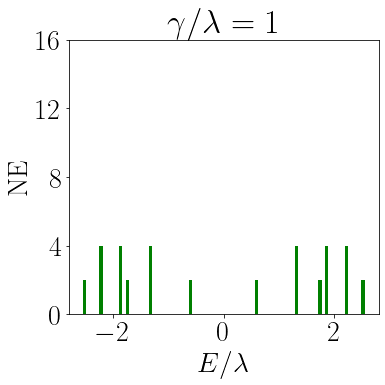

In [24]:
fig, ax = plt.subplots(figsize=(6,6))
bins = 85
ax.hist(Ek1,bins, facecolor='g')
ax.set_ylabel('NE')
ax.set_xlabel('$E/\lambda$')
ax.set_yticks([0,4,8,12,16])
ax.set_title('$\gamma/\lambda = 1$')

plt.tight_layout()
plt.savefig('images/bars_square2.pdf')
plt.savefig('images/bars_square2.png')

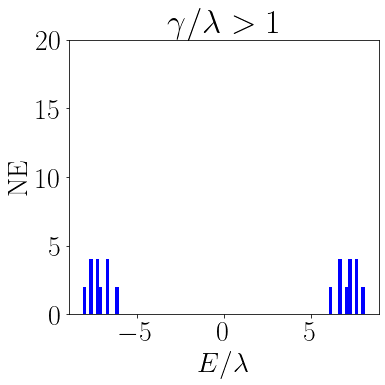

In [25]:
fig, ax = plt.subplots(figsize=(6,6))
bins = 86
ax.hist(Ek2,bins, facecolor='b')
ax.set_ylabel('NE')
ax.set_xlabel('$E/\lambda$')
ax.set_yticks([0,5,10,15,20])
ax.set_title('$\gamma/\lambda > 1$')

plt.tight_layout()
plt.savefig('images/bars_square3.pdf')
plt.savefig('images/bars_square3.png')

In [26]:
def wave_function(Ek,U,arg='all'):
    Est  = argsort(abs(Ek))[0:4]
    if arg == 'pos':
        Est = Est[Ek[Est]>0]
    elif arg == 'neg':
        Est = Est[Ek[Est]<0]
    ek = np.mean(Ek[Est])
    s = [np.real(U[i]*U.conjugate()[i]) for i in Est]
    S = np.zeros(len(s[0]))
    for i in range(len(s)):
        S += s[i] 
    S = S/sum(S)
    Est = Est
    return S,Est

In [27]:
W0,Est = wave_function(Ek0,U0)

In [28]:
Ek0[Est]

array([ 0.05432488, -0.05432488,  0.05432488, -0.05432488])

In [29]:
def density_of_states(Ek,U,arg='all'):
    indexsort = argsort(Ek)
    Est  = argsort(abs(Ek))[0:4]
    if arg == 'pos':
        Est = Est[Ek[Est]>0]
    elif arg == 'neg':
        Est = Est[Ek[Est]<0]
    #Est = [i for i,val in enumerate(Ek) if abs(val) < 0.2]
    #print(Est)
    ek = np.mean(Ek[Est])
    s = [np.real(U[i]*U.conjugate()[i]) for i in Est]
    S = np.zeros(len(s[0]))
    for i in range(len(s)):
        S += s[i] 
    S = S/sum(S)
    return S

In [30]:
def density_of_states_array(Ek,U):
    indexsort = argsort(Ek)
    #Est = [i for i,val in enumerate(Ek) if abs(val) < 0.2]
    ek = np.mean(Ek[Est])
    s = [np.real(U[i]*U.conjugate()[i]) for i in Est]
    S = np.zeros(len(s[0]))
    for i in range(len(s)):
        S += s[i] 
    S = S/sum(S)
    #print(Est)
    return s

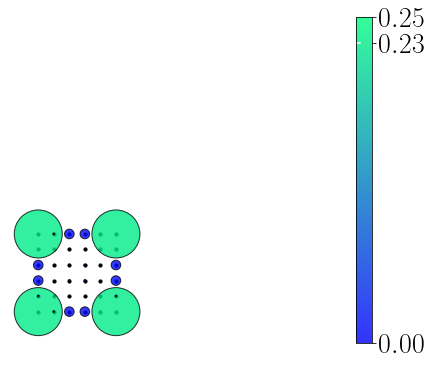

In [31]:
fig,ax = subplots(figsize=(8,6))
S0 = density_of_states(Ek0,U0,arg='all')
ax.scatter(x,y, s=10,c ='black')
bar = ax.scatter(x,y, s=S0*10000, alpha=0.8,c=S0, 
                 cmap='winter',edgecolor='black', vmin=0,vmax=0.25)
ax.set_xlim((-2,19))
ax.set_ylim((-2,19))
c = fig.colorbar(bar, ax=ax, ticks=[0,round(S0[0],2),0.25])
c.ax.plot([0, 0.25], [round(S0[0],2),round(S0[0],2)], 'w')
ax.set_aspect('equal')
ax.axis("off")
plt.savefig('images/proyection_square.png')
plt.savefig('images/proyection_square.pdf')
plt.show()


Text(0, 0.5, 'E')

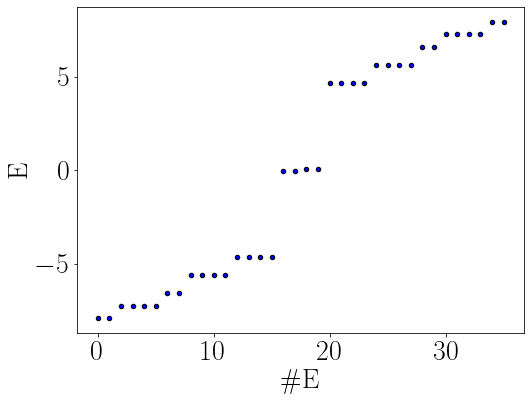

In [32]:
fig,ax = subplots(figsize=(8,6))
Esort = sort(Ek0)
Ey = range(len(Ek0))
ax.scatter(Ey,Esort,s=20,c='b', edgecolor='black')
#ax.set_ylim((-5,5))
#ax.set_xlim((141,181))
ax.set_xlabel('$\#$E')
ax.set_ylabel('E')

In [33]:
S0 = density_of_states(Ek0,U0)
wave = reshape(S0, (18,18))

ValueError: cannot reshape array of size 36 into shape (18,18)

In [34]:
E_γλ = [] #run onece
for γ in linspace(-2,2,51):
    H = Hoti_Hamiltonian(γ,1)
    Ek, U = eigh(H)
    Ek = np.real(Ek)
    indexsort = argsort(Ek)
    E_γλ.append(Ek[indexsort])
E = array(E_γλ)    
savetxt("param_bands.txt",E,fmt = '%s', comments = '')

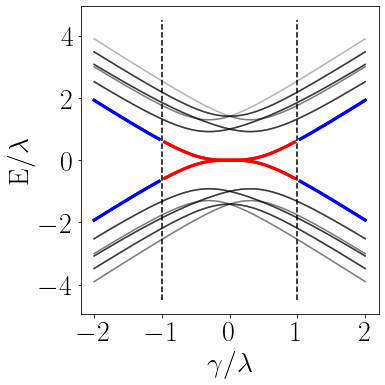

In [35]:
E = loadtxt("param_bands.txt",unpack=True)
fig,ax = plt.subplots(figsize=(6,6))
for i in range(n):
    Param = linspace(-2,2,51)
    if i in Est:
        PM = [j for j in range(len(Param)) if Param[j]>=1]
        Pm = [j for j in range(len(Param)) if Param[j]<=-1]
        Pc = [j for j in range(len(Param)) if abs(Param[j])<=1]
        ax.plot(Param[Pm],E[i][Pm],lw=3,c='blue')
        ax.plot(Param[PM],E[i][PM],lw=3, c='blue')
        ax.plot(Param[Pc],E[i][Pc],lw=3, c='red')
    else:
        ax.plot(Param,E[i], c='black',alpha =0.3)
        
ax.plot([-1,-1],[-4.5,4.5],ls='--', c='black')
ax.plot([1,1],[-4.5,4.5],ls='--', c='black')
ax.set_xticks([-2,-1,0,1,2])        
ax.set_xlabel('$\gamma/\lambda$')
ax.set_ylabel('E$/\lambda$')
#ax.set_title('a)',loc='left')
plt.tight_layout()
plt.savefig('images/bands_square_shh.pdf')
plt.savefig('images/bands_square_shh.png')

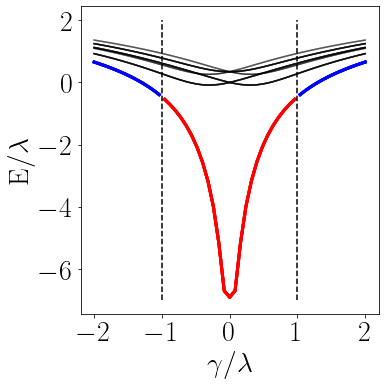

In [36]:
E = loadtxt("param_bands.txt",unpack=True)
fig,ax = plt.subplots(figsize=(6,6))
for i in range(n):
    Param = linspace(-2,2,51)
    if i in Est:
        PM = [j for j in range(len(Param)) if Param[j]>=1]
        Pm = [j for j in range(len(Param)) if Param[j]<=-1]
        Pc = [j for j in range(len(Param)) if abs(Param[j])<=1]
        ax.plot(Param[Pm],log(abs(E[i]))[Pm],lw=3,c='blue')
        ax.plot(Param[PM],log(abs(E[i]))[PM],lw=3, c='blue')
        ax.plot(Param[Pc],log(abs(E[i]))[Pc],lw=3, c='red')
    else:
        ax.plot(Param,log(abs(E[i])), c='black',alpha =0.3)
        
ax.plot([-1,-1],[-7,2],ls='--', c='black')
ax.plot([1,1],[-7,2],ls='--', c='black')
ax.set_xticks([-2,-1,0,1,2])        
ax.set_xlabel('$\gamma/\lambda$')
ax.set_ylabel('E$/\lambda$')
#ax.set_title('a)',loc='left')
plt.tight_layout()
plt.savefig('images/bands_square_shh_log.pdf')
plt.savefig('images/bands_square_shh_log.png')

# Modelo Infinito

In [92]:
def SSH(kx,ky,γ,λ):
    δ = 1e-5
    H = np.array([[δ,γ+λ*exp(-1J*kx),0,γ-λ*exp(1J*ky)],
                  [γ+λ*exp(1J*kx),-δ,-γ+λ*exp(1J*ky),0],
                  [0,-γ+λ*exp(-1J*ky),-δ,γ+λ*exp(1J*kx)],
                  [γ-λ*exp(-1J*ky),0,γ+λ*exp(-1J*kx),δ]])
    return H

# High Order Topological Pump

In [93]:
A   = 0.5     # μm
def func_cext(θ,A,λ):
    return  λ*exp(-(1+A*cos(θ)))

def func_cint(θ,A,γ):
    return γ*exp(-(1-A*cos(θ)))

def Hoti_Hamiltonian_transport(A, θ, γ, ϵ=epsi, natoms=natoms, M_rand=M_rand, conection=False):
    H = Hoti_Hamiltonian(func_cint(θ,A,γ), func_cext(θ,A,1), ϵ=epsi,δ=0.05*sin(θ), 
                         natoms=natoms, M_rand=M_rand, conection=False)
    return H

In [94]:
A  = 0.5
H0 = Hoti_Hamiltonian_transport(A,-pi,1)
H1 = Hoti_Hamiltonian_transport(A,0,1)
H2 = Hoti_Hamiltonian_transport(A,pi,1)

Ek0, U0 = eigh(H0)
Ek0 = np.real(Ek0)

Ek1, U1 = eigh(H1)
Ek1 = np.real(Ek1)

Ek2, U2 = eigh(H2)
Ek2 = np.real(Ek2)

savetxt("E0_pump.txt",Ek0,fmt = '%s', comments = '')
savetxt("Est0_pump.txt",U0,fmt = '%s', comments = '')

savetxt("E1_pump.txt",Ek1,fmt = '%s', comments = '')
savetxt("Est1_pump.txt",U1,fmt = '%s', comments = '')

savetxt("E2_pump.txt",Ek2,fmt = '%s', comments = '')
savetxt("Est2_pump.txt",U2,fmt = '%s', comments = '')

In [95]:
Ek0 = loadtxt("E0_pump.txt", unpack=True)
U0  = loadtxt("Est0_pump.txt", dtype=complex, unpack=True)

Ek1 = loadtxt("E1_pump.txt", unpack=True)
U1  = loadtxt("Est1_pump.txt", dtype=complex, unpack=True)

Ek2 = loadtxt("E2_pump.txt", unpack=True)
U2  = loadtxt("Est2_pump.txt", dtype=complex, unpack=True)

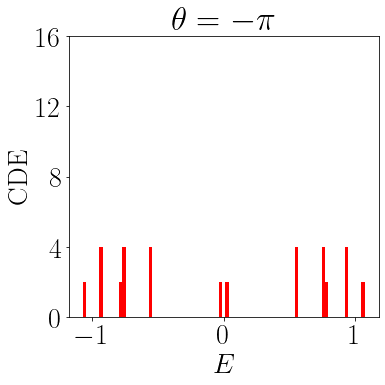

In [96]:
fig, ax = plt.subplots(figsize=(6,6))
bins = 85
ax.hist(Ek0,bins, facecolor='r')
ax.set_ylabel('CDE')
ax.set_xlabel('$E$')
ax.set_yticks([0,4,8,12,16])
ax.set_title('$\\theta = -\pi$')

plt.tight_layout()
plt.savefig('images/bars_square_pump1.pdf')
plt.savefig('images/bars_square_pump1.png')

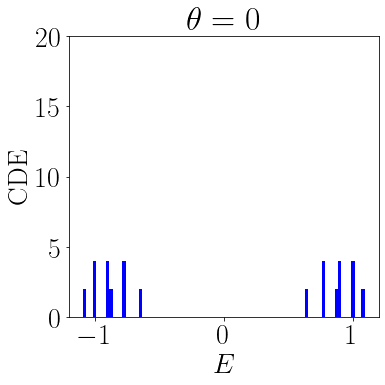

In [97]:
fig, ax = plt.subplots(figsize=(6,6))
bins = 85
ax.hist(Ek1,bins, facecolor='b')
ax.set_ylabel('CDE')
ax.set_xlabel('$E$')
ax.set_yticks([0,5,10,15,20])
ax.set_title('$\\theta = 0$')

plt.tight_layout()
plt.savefig('images/bars_square_pump2.pdf')
plt.savefig('images/bars_square_pump2.png')

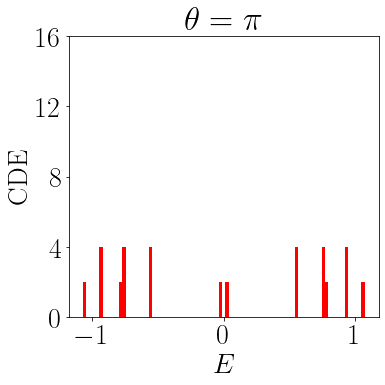

In [98]:
fig, ax = plt.subplots(figsize=(6,6))
bins = 85
ax.hist(Ek2,bins, facecolor='r')
ax.set_ylabel('CDE')
ax.set_xlabel('$E$')
ax.set_yticks([0,4,8,12,16])
ax.set_title('$\\theta = \pi$')

plt.tight_layout()
plt.savefig('images/bars_square_pump3.pdf')
plt.savefig('images/bars_square_pump3.png')

In [102]:
E_θ = []
posx = []
for θ in linspace(-pi,pi,51):
    H = Hoti_Hamiltonian_transport(0.5,θ,0.5)
    Ek, U = eigh(H)
    Ek = np.real(Ek)
    indexsort = argsort(Ek)
    E_θ.append(Ek[indexsort])
    posx.append(θ)
E = array(E_θ)    
savetxt("param_bands_pump.txt",E,fmt = '%s', comments = '')


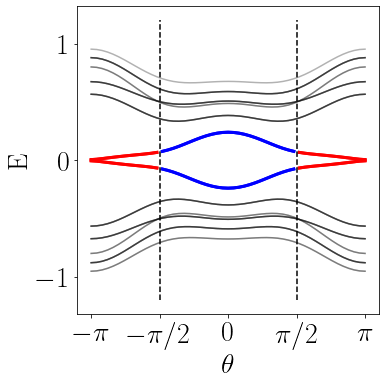

In [103]:
E = loadtxt("param_bands_pump.txt",unpack=True)
fig,ax = plt.subplots(figsize=(6,6))
for i in range(n):
    Param = linspace(-pi,pi,51)
    if i in Est:
        PM = [j for j in range(len(Param)) if Param[j]>=pi/2]
        Pm = [j for j in range(len(Param)) if Param[j]<=-pi/2]
        Pc = [j for j in range(len(Param)) if abs(Param[j])<=pi/2]
        ax.plot(Param[Pm],E[i][Pm],lw=3,c='red')
        ax.plot(Param[PM],E[i][PM],lw=3, c='red')
        ax.plot(Param[Pc],E[i][Pc],lw=3, c='blue')
    else:
        ax.plot(Param,E[i], c='black', alpha=0.3)
        
ax.plot([-pi/2,-pi/2],[-1.2,1.2],ls='--', c='black')
ax.plot([pi/2,pi/2],[-1.2,1.2],ls='--', c='black')
ax.set_xticks([-pi,-pi/2,0,pi/2,pi])
ax.set_xticklabels(['$-\pi$','$-\pi/2$','0','$\pi/2$','$\pi$'])    
ax.set_xlabel('$\\theta$')
ax.set_ylabel('E')
#ax.set_title('a)',loc='left')
plt.tight_layout()
plt.savefig('images/param_pump_A=0.5.png')
plt.savefig('images/param_pump_A=0.5.pdf')



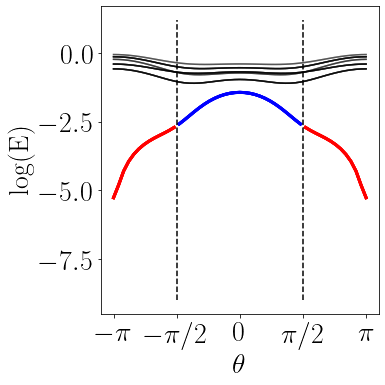

In [104]:
E = loadtxt("param_bands_pump.txt",unpack=True)
fig,ax = plt.subplots(figsize=(6,6))
for i in range(n):
    Param = linspace(-pi,pi,51)
    if i in Est:
        PM = [j for j in range(len(Param)) if Param[j]>=pi/2]
        Pm = [j for j in range(len(Param)) if Param[j]<=-pi/2]
        Pc = [j for j in range(len(Param)) if abs(Param[j])<=pi/2]
        ax.plot(Param[Pm],log(abs(E[i]))[Pm],lw=3,c='red')
        ax.plot(Param[PM],log(abs(E[i]))[PM],lw=3, c='red')
        ax.plot(Param[Pc],log(abs(E[i]))[Pc],lw=3, c='blue')
    else:
        ax.plot(Param,log(abs(E[i])), c='black',alpha=0.3)
        
ax.plot([-pi/2,-pi/2],[-9,1.2],ls='--', c='black')
ax.plot([pi/2,pi/2],[-9,1.2],ls='--', c='black')
ax.set_xticks([-pi,-pi/2,0,pi/2,pi])
ax.set_xticklabels(['$-\pi$','$-\pi/2$','0','$\pi/2$','$\pi$'])    
ax.set_xlabel('$\\theta$')
ax.set_ylabel('log(E)')
#ax.set_title('a)',loc='left')
plt.tight_layout()
plt.savefig('images/param_pump_A=0.5_log.png')
plt.savefig('images/param_pump_A=0.5_log.pdf')

# Corriente por cuadrante
$$ R(\nabla \cdot J) = \frac{d\rho}{dt}R$$

$$ R \cdot R(\nabla \cdot J) = \frac{d\rho}{dt}R \cdot R$$

$$ \frac{R \cdot R}{|R|^2}(\nabla \cdot J_{cell}) = \frac{d\rho_{cell}}{dt}\frac{R \cdot R}{|R|^2}$$


$$\int J_{cell} \cdot dA = \int \frac{d\rho_{cell}}{dt} dV$$

$$ J_{cell} =  \sum_{cell} \frac{d\rho_{cell}}{dt}  $$

In [125]:
import plotly.figure_factory as ff
Rx = []
Ry = []
γs = linspace(0,2,101)
γs = delete(γs,0)
for γ in γs:
    Pi_array = linspace(-pi,pi,101)

    H0 = Hoti_Hamiltonian_transport(0.5,-pi,γ)
    Ek0, U0 = eigh(H0)
    Ek0 = np.real(Ek0)
    s0 = density_of_states(Ek0.T,U0.T, arg='pos')
    n = 0
    jx = []
    jy = []
    for θ in Pi_array[1:]:
        H1 = Hoti_Hamiltonian_transport(0.5,θ,γ)
        Ek1, U1 = eigh(H1)
        Ek1 = np.real(Ek1)
        s1 = density_of_states(Ek1.T,U1.T,arg='pos')

        Cx = [] 
        Cy = []
        Cu = [] 
        Cv = []
        for z in np.unique(f):
            find = [j for j,val in enumerate(f) if val == z]
            X = [x[i] for i in find]
            Y = [y[i] for i in find]
            S0 = [s0[i] for i in find]
            S1 = [s1[i] for i in find]
            xmax = np.amax(X)
            xmin = np.amin(X)
            ymax = np.amax(Y)
            ymin = np.amin(Y)
            rx = (xmax + xmin)/2
            ry = (ymax + ymin)/2
            if (rx < 3) and (ry < 3):
                #print("({},{})".format(rx,ry))
                Jx = vdot(subtract(S1,S0),X-rx)
                Jy = vdot(subtract(S1,S0),Y-ry)
                Cx.append(rx)
                Cy.append(ry)
                Cu.append(2000*Jx)
                Cv.append(2000*Jy)

        jx.append(sum(Cu))
        jy.append(sum(Cv))
        U0 = U1 
        Ek0 = Ek1
        s0 = s1  
        n+=1
    Rx.append(jx)
    Ry.append(jy)

savetxt("Rx.txt",Rx,fmt = '%s', comments = '')  
savetxt("Ry.txt",Ry,fmt = '%s', comments = '')  

/home/toodivz/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning:

Mean of empty slice.

/home/toodivz/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars



IndexError: list index out of range

In [ ]:
Rx  = loadtxt('Rx.txt',unpack=True) 
Rx  = asmatrix(Rx.T)
Xs  = linspace(-pi,pi,101)
Ys  = linspace(0,2,101) 

if cal_value == True:
    val = 50#where(Rx == amax(Rx))[0][0]
    nval = Ys[val]
    savetxt("gamma_value.txt",[nval],fmt = '%s', comments = '')
    savetxt("cut_value.txt",[val],fmt = '%s', comments = '')
else:
    nval = float(nval)


fig,ax = plt.subplots(figsize=(7,6))
z_min, z_max = Rx.min(), Rx.max()
levels = linspace(-19, 19, 40)
#bar = ax.contourf(Xs, Ys, Rx, cmap='RdBu',levels=levels, vmin=-19, vmax=19)
bar = ax.pcolormesh(Xs, Ys, Rx, cmap='PuOr', vmin=z_min, vmax=z_max)
#bar = ax.imshow(flip(Rx))
ax.plot([-pi/2,-pi/2],[0,2],ls='--', c='black')
ax.plot([pi/2,pi/2],[0,2],ls='--', c='black')
ax.plot([-pi,pi],[nval,nval],ls='--', c='black')

ax.axis([Xs.min(), Xs.max(), Ys.min(), Ys.max()])
c = fig.colorbar(bar, ax=ax, ticks=[z_min,0,z_max])
c.set_ticklabels(["Min", "0", "Max"])
ax.set_xlabel('$\\theta$')
ax.set_ylabel('$\gamma/\lambda$')
ax.set_xticks([-pi,-pi/2,0,pi/2,pi])
ax.set_xticklabels(['$-\pi$','$-\pi/2$','0','$\pi/2$','$\pi$'])
ax.set_yticks([0,nval,2])
plt.tight_layout()
plt.savefig('images/current_square_pump.png')
plt.savefig('images/current_square_pump.pdf')

#fig.write_image("images/param_pump_Currenty_{}.png".format(round(nval,2)))

/tmp/ipykernel_178028/1765005131.py:19: MatplotlibDeprecationWarning:

For X (101) and Y (101) with flat shading, the expected shape of A is (100, 100). Passing A ((1, 10000)) is deprecated since 3.5 and will become an error two minor releases later.



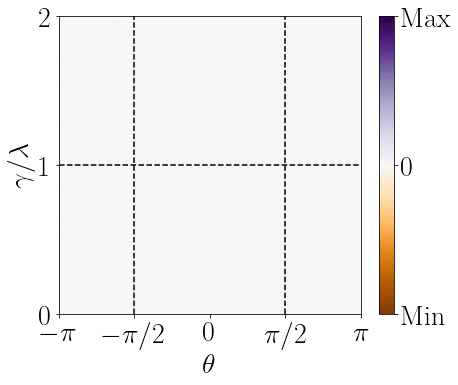

In [126]:
Ry  = loadtxt('Ry.txt',unpack=True) 
Ry  = asmatrix(Ry.T)
Xs  = linspace(-pi,pi,101)
Ys  = linspace(0,2,101) 

if cal_value == True:
    val = 50#where(Rx == amax(Rx))[0][0]
    nval = Ys[val]
    savetxt("gamma_value.txt",[nval],fmt = '%s', comments = '')
    savetxt("cut_value.txt",[val],fmt = '%s', comments = '')
else:
    nval = float(nval)


fig,ax = plt.subplots(figsize=(7,6))
z_min, z_max = Ry.min(), Ry.max()
levels = linspace(-19, 19, 40)
#bar = ax.contourf(Xs, Ys, Rx, cmap='RdBu',levels=levels, vmin=-19, vmax=19)
bar = ax.pcolormesh(Xs, Ys, Ry, cmap='PuOr', vmin=-50, vmax=50)
#bar = ax.imshow(flip(Rx))
ax.plot([-pi/2,-pi/2],[0,2],ls='--', c='black')
ax.plot([pi/2,pi/2],[0,2],ls='--', c='black')
ax.plot([-pi,pi],[nval,nval],ls='--', c='black')

ax.axis([Xs.min(), Xs.max(), Ys.min(), Ys.max()])
c = fig.colorbar(bar, ax=ax, ticks=[-50,0,50])
c.set_ticklabels(["Min", "0", "Max"])
ax.set_xlabel('$\\theta$')
ax.set_ylabel('$\gamma/\lambda$')
ax.set_xticks([-pi,-pi/2,0,pi/2,pi])
ax.set_xticklabels(['$-\pi$','$-\pi/2$','0','$\pi/2$','$\pi$'])
ax.set_yticks([0,nval,2])
plt.tight_layout()
plt.savefig('images/current_square_pumpy.png')
plt.savefig('images/current_square_pumpy.pdf')

#fig.write_image("images/param_pump_Currenty_{}.png".format(round(nval,2)))

In [127]:
import plotly.figure_factory as ff
Rx = []
Ry = []
γs = linspace(0,2,101)
γs = delete(γs,0)
for γ in γs:
    Pi_array = linspace(-pi,pi,101)

    H0 = Hoti_Hamiltonian_transport(0.5,-pi,γ)
    Ek0, U0 = eigh(H0)
    Ek0 = np.real(Ek0)
    s0 = density_of_states(Ek0.T,U0.T, arg='neg')
    n = 0
    jx = []
    jy = []
    for θ in Pi_array[1:]:
        H1 = Hoti_Hamiltonian_transport(0.5,θ,γ)
        Ek1, U1 = eigh(H1)
        Ek1 = np.real(Ek1)
        s1 = density_of_states(Ek1.T,U1.T,arg='neg')

        Cx = [] 
        Cy = []
        Cu = [] 
        Cv = []
        for z in np.unique(f):
            find = [j for j,val in enumerate(f) if val == z]
            X = [x[i] for i in find]
            Y = [y[i] for i in find]
            S0 = [s0[i] for i in find]
            S1 = [s1[i] for i in find]
            xmax = np.amax(X)
            xmin = np.amin(X)
            ymax = np.amax(Y)
            ymin = np.amin(Y)
            rx = (xmax + xmin)/2
            ry = (ymax + ymin)/2
            if (rx < 9) and (ry < 9):
                #print("({},{})".format(rx,ry))
                Jx = vdot(subtract(S1,S0),X-rx)
                Jy = vdot(subtract(S1,S0),Y-ry)
                Cx.append(rx)
                Cy.append(ry)
                Cu.append(2000*Jx)
                Cv.append(2000*Jy)

        jx.append(sum(Cu))
        jy.append(sum(Cv))
        U0 = U1 
        Ek0 = Ek1
        s0 = s1  
        n+=1
    Rx.append(jx)
    Ry.append(jy)

savetxt("Rx_neg.txt",Rx,fmt = '%s', comments = '')  
savetxt("Ry_neg.txt",Ry,fmt = '%s', comments = '')  

IndexError: list index out of range

In [ ]:
Rx  = loadtxt('Rx_neg.txt',unpack=True) 
Rx  = asmatrix(Rx.T)
Xs  = linspace(-pi,pi,101)
Ys  = linspace(0,2,101) 

if cal_value == True:
    val = 50#where(Rx == amax(Rx))[0][0]
    nval = Ys[val]
    savetxt("gamma_value.txt",[nval],fmt = '%s', comments = '')
    savetxt("cut_value.txt",[val],fmt = '%s', comments = '')
else:
    nval = float(nval)


fig,ax = plt.subplots(figsize=(7,6))
z_min, z_max = Rx.min(), Rx.max()
levels = linspace(-19, 19, 40)
#bar = ax.contourf(Xs, Ys, Rx, cmap='RdBu',levels=levels, vmin=-19, vmax=19)
bar = ax.pcolormesh(Xs, Ys, Rx, cmap='PuOr', vmin=-50, vmax=50)
#bar = ax.imshow(flip(Rx))
ax.plot([-pi/2,-pi/2],[0,2],ls='--', c='black')
ax.plot([pi/2,pi/2],[0,2],ls='--', c='black')
ax.plot([-pi,pi],[nval,nval],ls='--', c='black')

ax.axis([Xs.min(), Xs.max(), Ys.min(), Ys.max()])
c = fig.colorbar(bar, ax=ax, ticks=[-50,0,50])
c.set_ticklabels(["Min", "0", "Max"])
ax.set_xlabel('$\\theta$')
ax.set_ylabel('$\gamma/\lambda$')
ax.set_xticks([-pi,-pi/2,0,pi/2,pi])
ax.set_xticklabels(['$-\pi$','$-\pi/2$','0','$\pi/2$','$\pi$'])
ax.set_yticks([0,nval,2])
plt.tight_layout()
plt.savefig('images/current_square_pump.png')
plt.savefig('images/current_square_pump.pdf')

#fig.write_image("images/param_pump_Currenty_{}.png".format(round(nval,2)))

In [ ]:
index = argsort(S0)[-4:]

step = 101
γs = linspace(0,2,step)
θs = linspace(-pi,pi,step)

M = zeros([step,step])


for i in range(step):
    for j in range(step):
        H = Hoti_Hamiltonian_transport(A,θs[i],γs[j])
        Ek, U = eigh(H)
        Ek = np.real(Ek)
        S = density_of_states(Ek.T,U.T)
        M[i,j]  =  sum(S[index])/4
        
savetxt("param_pump_density_pump.txt",M,fmt = '%s', comments = '')


/tmp/ipykernel_178028/3220531876.py:10: MatplotlibDeprecationWarning:

For X (102) and Y (102) with flat shading, the expected shape of A is (101, 101). Passing A ((1, 10201)) is deprecated since 3.5 and will become an error two minor releases later.



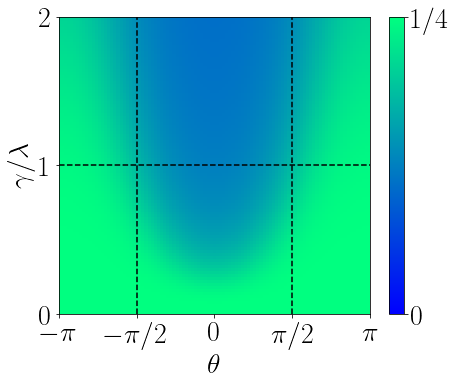

In [128]:
M = loadtxt("param_pump_density_pump.txt",unpack=True)

M  = asmatrix(M)
Xs  = linspace(-pi,pi,101)
Ys  = linspace(0,2,101) 


fig,ax = plt.subplots(figsize=(7,6))
z_min, z_max = M.min(), M.max()
bar = ax.pcolormesh(Xs, Ys, M, cmap='winter', vmin=0, vmax=z_max)

ax.plot([-pi/2,-pi/2],[0,2],ls='--', c='black')
ax.plot([pi/2,pi/2],[0,2],ls='--', c='black')
ax.plot([-pi,pi],[nval,nval],ls='--', c='black')

ax.axis([Xs.min(), Xs.max(), Ys.min(), Ys.max()])
c = fig.colorbar(bar, ax=ax, ticks=[0,z_max])
c.set_ticklabels(["0", "1/4"])
ax.set_xlabel('$\\theta$')
ax.set_ylabel('$\gamma/\lambda$')
ax.set_xticks([-pi,-pi/2,0,pi/2,pi])
ax.set_xticklabels(['$-\pi$','$-\pi/2$','0','$\pi/2$','$\pi$'])
ax.set_yticks([0,nval,2])
plt.tight_layout()
plt.savefig('images/Density_square_pump.png')
plt.savefig('images/Density_square_pump.pdf')
#fig.show()

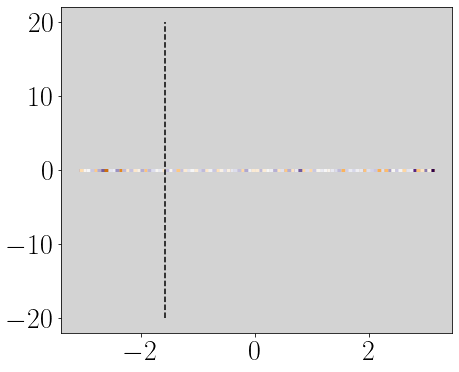

In [129]:
fig,ax = plt.subplots(figsize=(7,6))

Rx_neg  = loadtxt('Rx_neg.txt',unpack=True)
Rx_neg  = asmatrix(Rx_neg.T)

Rx  = loadtxt('Rx.txt',unpack=True)
Rx  = asmatrix(Rx.T)

CutCx = array(Rx[val]).reshape(100)
CutNCx = array(Rx_neg[val]).reshape(100)
#CutDx = array(M[val]*100).reshape(101)
#ax.plot(Xs[1:],Cutx)

colorline(Xs[1:],CutCx,ax,CutCx,cmap='PuOr')
colorline(Xs[1:],CutNCx,ax,CutNCx,cmap='PuOr')
#colorline(Xs,CutDx,ax,CutDx,cmap='winter')

ax.plot([-pi/2,-pi/2],[-20,20],ls='--', c='black')
#ax.plot([pi/2,pi/2],[-20,20],ls='--', c='black')
#c = fig.colorbar(bar, ax=ax, ticks=[-19,0,19])
#ax.set_yticks([CutCx.min(),0,CutCx.max()])
#ax.set_yticklabels(["Min", "0", "Max"])
#ax.set_ylim((CutCx.min(),CutCx.max()))
#ax.set_ylabel('$\sum_{c}\sum_{cell} (d \\rho_i/dt) R_i\cdot\hat{x}$')
#ax.set_xticks([-pi,-pi/2,0,pi/2,pi])
#ax.set_xticklabels(['$-\pi$','$-\pi/2$','0','$\pi/2$','$\pi$'])
ax.set_facecolor('#D3D3D3')

### Simulations

In [130]:
S_array = []
Pi_array = linspace(-pi,pi,51)
for θ in Pi_array:
    H = Hoti_Hamiltonian_transport(0.5,θ,0.5)
    Ek, U = eigh(H)
    Ek = np.real(Ek)
    S = density_of_states(Ek.T,U.T, arg='pos') 
    S_array.append(S)

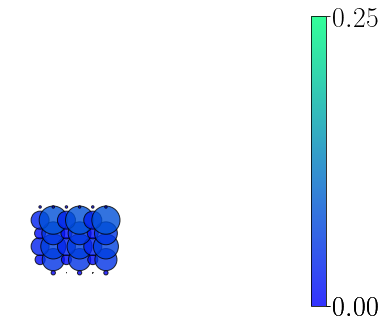

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig,ax = plt.subplots(figsize=(6,6))#ax = fig.add_subplot(111)

div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')

ax.scatter(x,y, s=10,c ='black')


def animate(i):
    ax.clear()
    cf = ax.scatter(x,y, s=S_array[i]*10000, alpha=0.8,c=S_array[i], 
                 cmap='winter',edgecolor='black', vmin=0,vmax=0.25)
    cax.cla()
    fig.colorbar(cf, cax=cax, ticks=[0,round(S_array[i][0],2),0.25])
    c.ax.plot([0, 0.25], 
              [round(S_array[i][0],2),round(S_array[i][0],2)], 'w')
    ax.set_xlim((-2.5,19.5))
    ax.set_ylim((-2.5,19.5))
    ax.set_aspect('equal')
    ax.axis("off")
    fig.tight_layout()


ani = animation.FuncAnimation(fig, animate, frames=len(S_array))
ani.save('proyection_pump.gif', fps=12)
plt.show()

In [132]:
import plotly.figure_factory as ff
step = 25
S_array = []
Pi_array = linspace(-pi,pi,step)
for θ in Pi_array:
    H = Hoti_Hamiltonian_transport(A,θ,nval)
    Ek, U = eigh(H)
    Ek = np.real(Ek)
    S = density_of_states(Ek.T,U.T, arg='pos') 
    S_array.append(S)
    
#print(S_array)
H0 = Hoti_Hamiltonian_transport(A,-pi,nval)
Ek0, U0 = eigh(H0)
Ek0 = np.real(Ek0)
s0 = density_of_states(Ek0.T,U0.T, arg='pos')
n = 0

ArrCx = [] 
ArrCy = []
ArrCu = [] 
ArrCv = []
ArrS  = []
for θ in Pi_array[1:]:
    H1 = Hoti_Hamiltonian_transport(A,θ,nval)
    Ek1, U1 = eigh(H1)
    Ek1 = np.real(Ek1)
    s1 = density_of_states(Ek1.T,U1.T, arg='pos')
    
    Cx = [] 
    Cy = []
    Cu = [] 
    Cv = []
    for z in np.unique(f):
        find = [j for j,val in enumerate(f) if val == z]
        X = [x[i] for i in find]
        Y = [y[i] for i in find]
        S0 = [s0[i] for i in find]
        S1 = [s1[i] for i in find]
        xmax = np.amax(X)
        xmin = np.amin(X)
        ymax = np.amax(Y)
        ymin = np.amin(Y)
        rx = (xmax + xmin)/2
        ry = (ymax + ymin)/2
        Jx = vdot(subtract(S1,S0),X-rx)
        Jy = vdot(subtract(S1,S0),Y-ry)
        Cx.append(rx)
        Cy.append(ry)
        Cu.append(Jx)
        Cv.append(Jy)
        
    ArrCx.append(Cx)
    ArrCy.append(Cy)
    ArrCu.append(Cu)
    ArrCv.append(Cv)
    ArrS.append(s1)
    
    
    U0 = U1 
    Ek0 = Ek1
    s0 = s1  
    n+=1     

IndexError: list index out of range

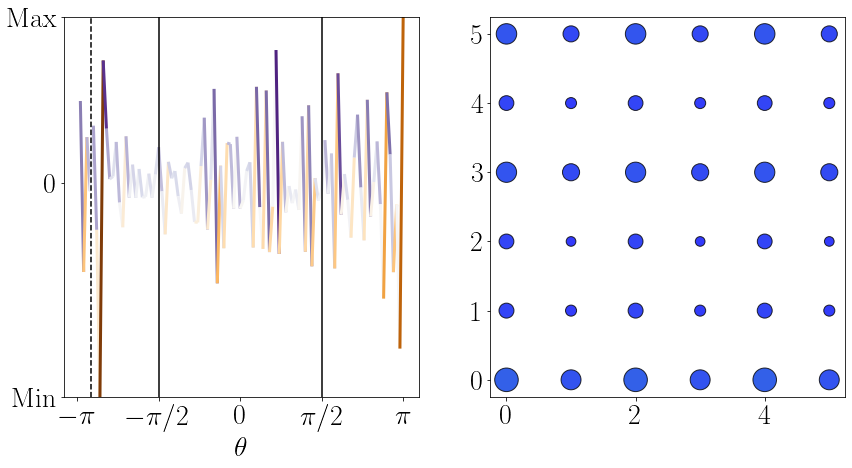

In [133]:
#pip install mycolorpy
from mycolorpy import colorlist as mcp
max_nr = norm([amax(asmatrix(ArrCu)),amax(asmatrix(ArrCv))])
n = len(ArrCx)
CutCx = array(Rx[val]).reshape(100)
#CutDx = array(M[val]*100).reshape(101)


for i in range(n):
    Cx  = ArrCx[0]
    Cy  = ArrCy[0]
    Cu  = array(ArrCu[i])
    Cv  = array(ArrCv[i])
    s1  = ArrS[i]
    
    fig, ax = plt.subplots(1,2, figsize=(14,7))
    
    #plot corte de parametros    

    colorline(Xs[1:],CutCx,ax[0],CutCx,cmap='PuOr')
    #colorline(Xs,CutDx,ax[0],CutDx,cmap='winter')
    
    ax[0].plot([Pi_array[1:][i],Pi_array[1:][i]],[-20,20],ls='--', c='black')
    
    ax[0].plot([-pi/2,-pi/2],[-20,20], c='black')
    ax[0].plot([pi/2,pi/2],[-20,20], c='black')
    #c = fig.colorbar(bar, ax=ax, ticks=[-19,0,19])
    ax[0].set_yticks([CutCx.min(),0,CutCx.max()])
    ax[0].set_yticklabels(["Min", "0", "Max"])
    ax[0].set_ylim((CutCx.min(),CutCx.max()))
    #ax.set_ylabel('$\sum_{c}\sum_{cell} (d \\rho_i/dt) R_i\cdot\hat{x}$')
    ax[0].set_xlabel('$\\theta$')
    ax[0].set_xticks([-pi,-pi/2,0,pi/2,pi])
    ax[0].set_xticklabels(['$-\pi$','$-\pi/2$','0','$\pi/2$','$\pi$'])
    
    
    #plot proyeccion en el tiempo
    ax[1].scatter(x,y, s=S_array[i]*10000, alpha=0.8,c=S_array[i], 
                 cmap='winter',edgecolor='black',linewidth = 1,vmin=0, vmax=0.25)
    
    
    nr    = sqrt(Cu*Cu + Cv*Cv)
    size  = log(nr+1)/log(max(nr)+1)
     
    color=mcp.gen_color(cmap="PuOr",n=51)  
    norm = matplotlib.colors.Normalize()
    norm.autoscale(CutCx)
    
    
    Indexcolor = [Cu[i] for i in range(len(Cx)) if Cx[i]<9 and Cy[i]<9]
    indexcolor = int(norm(sum(Indexcolor)*200)*51)
    
    ax[1].quiver(Cx,Cy, size*Cu/nr,size*Cv/nr, scale_units='xy', scale=0.3, 
                 width=0.01,color=color[indexcolor], edgecolor='black', linewidth = 1)
    #ax[0].scatter([Pi_array[1:][i]],[sum(Indexcolor)*200])
    
    #ax[1].set_facecolor('#D3D3D3')
    ax[1].set_xlim((-2.5,19.5))
    ax[1].set_ylim((-2.5,19.5))
    ax[1].set_aspect('equal')
    ax[1].axis("off")


    fig.savefig('images/video_images/hoti_pomp_cut{}.pdf'.format(i))
    fig.show()
   


In [ ]:
import plotly.figure_factory as ff
step = 52
S_array = []
Pi_array = linspace(-pi,pi,step)
for θ in Pi_array:
    H = Hoti_Hamiltonian_transport(A,θ,nval)
    Ek, U = eigh(H)
    Ek = np.real(Ek)
    S = density_of_states(Ek.T,U.T) 
    S_array.append(S)
    
#print(S_array)
H0 = Hoti_Hamiltonian_transport(A,-pi,nval)
Ek0, U0 = eigh(H0)
Ek0 = np.real(Ek0)
s0 = density_of_states(Ek0.T,U0.T)
n = 0

ArrCx = [] 
ArrCy = []
ArrCu = [] 
ArrCv = []
ArrS  = []
for θ in Pi_array[1:]:
    H1 = Hoti_Hamiltonian_transport(A,θ,nval)
    Ek1, U1 = eigh(H1)
    Ek1 = np.real(Ek1)
    s1 = density_of_states(Ek1.T,U1.T)
    
    Cx = [] 
    Cy = []
    Cu = [] 
    Cv = []
    for z in np.unique(f):
        find = [j for j,val in enumerate(f) if val == z]
        X = [x[i] for i in find]
        Y = [y[i] for i in find]
        S0 = [s0[i] for i in find]
        S1 = [s1[i] for i in find]
        xmax = np.amax(X)
        xmin = np.amin(X)
        ymax = np.amax(Y)
        ymin = np.amin(Y)
        rx = (xmax + xmin)/2
        ry = (ymax + ymin)/2
        Jx = vdot(subtract(S1,S0),X-rx)
        Jy = vdot(subtract(S1,S0),Y-ry)
        Cx.append(rx)
        Cy.append(ry)
        Cu.append(Jx)
        Cv.append(Jy)
        
    ArrCx.append(Cx)
    ArrCy.append(Cy)
    ArrCu.append(Cu)
    ArrCv.append(Cv)
    ArrS.append(s1)
    
    
    U0 = U1 
    Ek0 = Ek1
    s0 = s1  
    n+=1     

In [ ]:
#pip install mycolorpy
from mycolorpy import colorlist as mcp
max_nr = norm([amax(asmatrix(ArrCu)),amax(asmatrix(ArrCv))])
n = len(ArrCx)
CutCx = array(Rx[val]).reshape(100)
CutDx = array(M[val]*100).reshape(101)


for i in range(n):
    Cx  = ArrCx[0]
    Cy  = ArrCy[0]
    Cu  = array(ArrCu[i])
    Cv  = array(ArrCv[i])
    s1  = ArrS[i]
    
    fig, ax = plt.subplots(1,2, figsize=(14,7))
    
    #plot corte de parametros    

    colorline(Xs[1:],CutCx,ax[0],CutCx,cmap='PuOr')
    colorline(Xs,CutDx,ax[0],CutDx,cmap='winter')
    
    ax[0].plot([Pi_array[1:][i],Pi_array[1:][i]],[-20,20],ls='--', c='black')
    
    ax[0].plot([-pi/2,-pi/2],[-20,20], c='black')
    ax[0].plot([pi/2,pi/2],[-20,20], c='black')
    #c = fig.colorbar(bar, ax=ax, ticks=[-19,0,19])
    ax[0].set_yticks([CutCx.min(),0,CutCx.max()])
    ax[0].set_yticklabels(["Min", "0", "Max"])
    ax[0].set_ylim((CutCx.min(),CutCx.max()))
    #ax.set_ylabel('$\sum_{c}\sum_{cell} (d \\rho_i/dt) R_i\cdot\hat{x}$')
    ax[0].set_xlabel('$\\theta$')
    ax[0].set_xticks([-pi,-pi/2,0,pi/2,pi])
    ax[0].set_xticklabels(['$-\pi$','$-\pi/2$','0','$\pi/2$','$\pi$'])
    
    
    #plot proyeccion en el tiempo
    ax[1].scatter(x,y, s=S_array[i]*10000, alpha=0.8,c=S_array[i], 
                 cmap='winter',edgecolor='black',linewidth = 1,vmin=0, vmax=0.25)
    
    
    nr    = sqrt(Cu*Cu + Cv*Cv)
    size  = log(nr+1)/log(max(nr)+1)
     
    color=mcp.gen_color(cmap="PuOr",n=51)  
    norm = matplotlib.colors.Normalize()
    norm.autoscale(CutCx)
    
    
    Indexcolor = [Cu[i] for i in range(len(Cx)) if Cx[i]<9 and Cy[i]<9]
    indexcolor = int(norm(sum(Indexcolor)*200)*51)
    
    ax[1].quiver(Cx,Cy, size*Cu/nr,size*Cv/nr, scale_units='xy', scale=0.3, 
                 width=0.01,color=color[indexcolor], edgecolor='black', linewidth = 1)
    #ax[0].scatter([Pi_array[1:][i]],[sum(Indexcolor)*200])
    
    #ax[1].set_facecolor('#D3D3D3')
    ax[1].set_xlim((-2.5,19.5))
    ax[1].set_ylim((-2.5,19.5))
    ax[1].set_aspect('equal')
    ax[1].axis("off")


    fig.savefig('images/video_images/hoti_pomp_cut{}.png'.format(i))
    fig.show()   

In [ ]:
import plotly.figure_factory as ff
Pi_array = linspace(-pi,pi,25)

H0 = Hoti_Hamiltonian_transport(A,-pi,nval)
Ek0, U0 = eigh(H0)
Ek0 = np.real(Ek0)
s0 = density_of_states(Ek0.T,U0.T)
n = 0

ArrCx = [] 
ArrCy = []
ArrCu = [] 
ArrCv = []
ArrS  = []
for θ in Pi_array[1:]:
    H1 = Hoti_Hamiltonian_transport(A,θ,nval)
    Ek1, U1 = eigh(H1)
    Ek1 = np.real(Ek1)
    s1 = density_of_states(Ek1.T,U1.T)
    
    Cx = [] 
    Cy = []
    Cu = [] 
    Cv = []
    for z in np.unique(f):
        find = [j for j,val in enumerate(f) if val == z]
        X = [x[i] for i in find]
        Y = [y[i] for i in find]
        S0 = [s0[i] for i in find]
        S1 = [s1[i] for i in find]
        xmax = np.amax(X)
        xmin = np.amin(X)
        ymax = np.amax(Y)
        ymin = np.amin(Y)
        rx = (xmax + xmin)/2
        ry = (ymax + ymin)/2
        Jx = vdot(subtract(S1,S0),X-rx)
        Jy = vdot(subtract(S1,S0),Y-ry)
        Cx.append(rx)
        Cy.append(ry)
        Cu.append(2000*Jx)
        Cv.append(2000*Jy)
        
    ArrCx.append(Cx)
    ArrCy.append(Cy)
    ArrCu.append(Cu)
    ArrCv.append(Cv)
    ArrS.append(s1)
    
    
    U0 = U1 
    Ek0 = Ek1
    s0 = s1  
    n+=1     

# Simulacion

In [ ]:
step = 24
S_array = []
Pi_array = linspace(-pi,pi,step)
for θ in Pi_array:
    H = Hoti_Hamiltonian_transport(A,θ,nval)
    Ek, U = eigh(H)
    Ek = np.real(Ek)
    S = density_of_states(Ek.T,U.T) 
    S_array.append(S)
    

    δ = 1e-3
C   = 1.0     # cm^-1
κ   = 1    # μm^-1
L   = 1   # μm
A   = 0.7     # μm
γ, λ = 1.0,nval


def func_cext1(θ,γ = 1.0, λ = nval):
    return  λ*exp(-κ*(L+A*cos(θ)))

def func_cint1(θ,γ = 1.0, λ = nval):
    return γ*exp(-κ*(L-A*cos(θ)))



x,y,f,d = np.loadtxt(name_array,usecols=(1,2,4,5),skiprows=2,unpack=True)
ind = np.argsort(f)
#x,y,f = x[ind], y[ind], f[ind]

r = 1.05
Dic_r = {}
natoms = int( len(x) )
for n in range(natoms):
    a = sqrt( (x[n]-x)*(x[n]-x) + (y[n]-y)*(y[n]-y) ) < r 
    vecinos = [i for i, x in enumerate(a) if x and i!=n]
    Dic_r[n] = vecinos
    
Hr = Hoti_Hamiltonian(1.0, 4.5, conection=False)

Hop = {}
for i in Dic_r.keys():
    Hop[i] = [real(Hr[i][j]) for j in range(len(Hr[i])) if Hr[i][j] != 0]
count=0

Jx  = loadtxt('Rx.txt',unpack=True) 
Jx  = asmatrix(Jx.T) 
jval = where(Jx == amax(Jx))[0][0]

dic_x = {i : x[i] for i in range(len(x))}
dic_y = {i : y[i] for i in range(len(y))}
for θ in np.linspace(-pi,pi,step):
    Nx = []
    Ny = []
    cx = (np.amax(x) + np.amin(x))/2
    cy = (np.amax(y) + np.amin(y))/2
    
    for i in np.unique(f):
        find = [j for j,val in enumerate(f) if val == i]
        #print(find)
        X = [x[i] for i in find]
        Y = [y[i] for i in find]
        xmax = np.amax(X)
        xmin = np.amin(X)
        ymax = np.amax(Y)
        ymin = np.amin(Y)
        #print(X)
        #print(Y)
        rx = ((xmax + xmin)/2 - cx)*func_cext1(θ,γ = 1.0, λ = 1.0)/2 + cx 
        ry = ((ymax + ymin)/2 - cy)*func_cext1(θ,γ = 1.0, λ = 1.0)/2 + cy

        X = func_cint1(θ,γ = 1.0, λ = 1.0)*(X - rx) + rx
        Y = func_cint1(θ,γ = 1.0, λ = 1.0)*(Y - ry) + ry
        
        for j in range(len(find)):
            dic_x[find[j]] = X[j]
            dic_y[find[j]] = Y[j]
            
        
        
    Rx = []
    Ry = []
    for i in np.unique(f):
        find = [j for j,val in enumerate(f) if val == i]
        X = [dic_x[i] for i in find]
        Y = [dic_y[i] for i in find]
        xmax = np.amax(X)
        xmin = np.amin(X)
        ymax = np.amax(Y)
        ymin = np.amin(Y)
        rx = (xmax + xmin)/2
        ry = (ymax + ymin)/2
        Rx.append(rx)
        Ry.append(ry)

    
        
    fig, ax = plt.subplots(1,2, figsize=(14,7))
    #ax[1].plot(Nx,Ny, marker='o', color='black', markersize=2,linestyle="")
    #ax[1].scatter(Nx,Ny, color='red', alpha=0.9, s=S_array[count][ind]*20000)
    
    ω = np.linspace(-pi,pi,101)
    CutDx = array(M[val]*200).reshape(101)
    ω1 = np.linspace(-pi,pi,len(array(Jx[jval])[0]))
    
    

    ax[0].plot(func_cint1(ω) - func_cext1(ω), sin(ω), color='black', ls='-', lw=4, alpha=0.1)
    colorline(func_cint1(ω) - func_cext1(ω), sin(ω), ax[0], CutDx, cmap='winter')

    
        
    mid = func_cint1(pi/2) - func_cext1(pi/2)
    ax[0].plot([func_cint1(-pi) - func_cext1(-pi) , mid], [sin(-pi),0], marker='o',color='red', ls='-', lw=4)
    ax[0].plot([func_cint1(0) - func_cext1(0) , mid], [sin(0),0], marker='o',color='blue', ls='-', lw=4)
    
    ax[0].arrow(func_cint1(pi/4) - func_cext1(pi/4), sin(pi/4), 
               -0.01,0.02,
                  head_width=0.03, head_length=0.05, fc='black', ec='black')
    
    ax[0].text((func_cint1(-pi) - func_cext1(-pi) + func_cint1(pi/2) - func_cext1(pi/2))/2 - 0.1, 
               sin(-pi)+0.05,'Topológica' , color='black')
    ax[0].text((func_cint1(pi/2) - func_cext1(pi/2) + func_cint1(0) - func_cext1(0))/2 - 0.1, 
               sin(-pi)+0.05,'Trivial' , color='black')
    ax[0].plot([func_cint1(θ) - func_cext1(θ)], [sin(θ)], marker='o', color='black', markersize=20)


    boxes = []
    for i in range(len(Rx)):
        rect = Rectangle((Rx[i]- 0.4, Ry[i] - 0.4), 0.8,0.8)
        boxes.append(rect)
    
    for i in Dic_r.keys():
        c = 0
    
        for v in Dic_r[i]:
            #print(Hop[i][c])
            if Hop[i][c] == 1:
                ax[1].plot((dic_x[i],dic_x[v]),(dic_y[i],dic_y[v]),c = 'black', lw = 1)
            elif Hop[i][c] == -1:
                ax[1].plot((dic_x[i],dic_x[v]),(dic_y[i],dic_y[v]),c = 'black', lw = 1, ls = ':')
            elif Hop[i][c] == 4.5:
                ax[1].plot((dic_x[i],dic_x[v]),(dic_y[i],dic_y[v]),c = 'r', lw =1)
            elif Hop[i][c] == -4.5:
                ax[1].plot((dic_x[i],dic_x[v]),(dic_y[i],dic_y[v]),c = 'r', lw =1, ls = ':')
            c+=1


    pc = PatchCollection(boxes, facecolor='#e6e6e6', alpha=0.7,edgecolor='black')
    ax[1].add_collection(pc)
    #print(len(S_array))
    
    cmap = plt.get_cmap('RdBu', len(S_array))
    cmaplist = [cmap(i) for i in range(cmap.N)]
    
    
    Nx = [i for i in dic_x.values()]
    Ny = [i for i in dic_y.values()]

    ax[1].scatter(Nx,Ny, s=S_array[count]*10000, alpha=0.8,c=S_array[count], 
                 cmap='winter',edgecolor='black', vmin=0,vmax=0.25)
    
    
    fig.tight_layout()
    ax[1].set_aspect('equal')
    #ax.set_title(r'$\lambda = 4.5, \gamma = 1$')
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].set_xlim(min(x)+2, max(x)-2)
    ax[1].set_ylim(min(y)+2, max(y)-2)
    ax[1].axis("off")

    
    
    ax[0].set_ylabel(r'$\epsilon(\theta)$')
    ax[0].set_xlabel(r'$\lambda(\theta) - \gamma(\theta)$')
    ax[0].set_xticks([round(mid,2)])
    ax[0].set_yticks([0.0])
    ax[0].grid(linestyle='--', lw=2)
    
    fig.tight_layout()
    #fig.savefig('hoti_pomp_{}.pdf'.format(θ))
    fig.savefig('images/video_images2/hoti_pomp_{}.pdf'.format(count))
    #fig.savefig('images/video_images2/hoti_pomp_{}.png'.format(count))
    count+=1
    
    plt.show()

In [ ]:
step = 51
S_array = []
Pi_array = linspace(-pi,pi,step)
for θ in Pi_array:
    H = Hoti_Hamiltonian_transport(A,θ,nval)
    Ek, U = eigh(H)
    Ek = np.real(Ek)
    S = density_of_states(Ek.T,U.T) 
    S_array.append(S)
    

δ = 1e-3
C   = 1.0     # cm^-1
κ   = 1    # μm^-1
L   = 1   # μm
A   = 0.7     # μm
γ, λ = 1.0,nval


def func_cext1(θ,γ = 1.0, λ = nval):
    return  λ*exp(-κ*(L+A*cos(θ)))

def func_cint1(θ,γ = 1.0, λ = nval):
    return γ*exp(-κ*(L-A*cos(θ)))



x,y,f,d = np.loadtxt(name_array,usecols=(1,2,4,5),skiprows=2,unpack=True)
ind = np.argsort(f)
#x,y,f = x[ind], y[ind], f[ind]

r = 1.05
Dic_r = {}
natoms = int( len(x) )
for n in range(natoms):
    a = sqrt( (x[n]-x)*(x[n]-x) + (y[n]-y)*(y[n]-y) ) < r 
    vecinos = [i for i, x in enumerate(a) if x and i!=n]
    Dic_r[n] = vecinos
    
Hr = Hoti_Hamiltonian(1.0, 4.5, conection=False)

Hop = {}
for i in Dic_r.keys():
    Hop[i] = [real(Hr[i][j]) for j in range(len(Hr[i])) if Hr[i][j] != 0]
count=0

Jx  = loadtxt('Rx.txt',unpack=True) 
Jx  = asmatrix(Jx.T) 
jval = where(Jx == amax(Jx))[0][0]

dic_x = {i : x[i] for i in range(len(x))}
dic_y = {i : y[i] for i in range(len(y))}
for θ in np.linspace(-pi,pi,step):
    Nx = []
    Ny = []
    cx = (np.amax(x) + np.amin(x))/2
    cy = (np.amax(y) + np.amin(y))/2
    
    for i in np.unique(f):
        find = [j for j,val in enumerate(f) if val == i]
        #print(find)
        X = [x[i] for i in find]
        Y = [y[i] for i in find]
        xmax = np.amax(X)
        xmin = np.amin(X)
        ymax = np.amax(Y)
        ymin = np.amin(Y)
        #print(X)
        #print(Y)
        rx = ((xmax + xmin)/2 - cx)*func_cext1(θ,γ = 1.0, λ = 1.0)/2 + cx 
        ry = ((ymax + ymin)/2 - cy)*func_cext1(θ,γ = 1.0, λ = 1.0)/2 + cy

        X = func_cint1(θ,γ = 1.0, λ = 1.0)*(X - rx) + rx
        Y = func_cint1(θ,γ = 1.0, λ = 1.0)*(Y - ry) + ry
        
        for j in range(len(find)):
            dic_x[find[j]] = X[j]
            dic_y[find[j]] = Y[j]
            
        
        
    Rx = []
    Ry = []
    for i in np.unique(f):
        find = [j for j,val in enumerate(f) if val == i]
        X = [dic_x[i] for i in find]
        Y = [dic_y[i] for i in find]
        xmax = np.amax(X)
        xmin = np.amin(X)
        ymax = np.amax(Y)
        ymin = np.amin(Y)
        rx = (xmax + xmin)/2
        ry = (ymax + ymin)/2
        Rx.append(rx)
        Ry.append(ry)

    
        
    fig, ax = plt.subplots(1,2, figsize=(14,7))
    #ax[1].plot(Nx,Ny, marker='o', color='black', markersize=2,linestyle="")
    #ax[1].scatter(Nx,Ny, color='red', alpha=0.9, s=S_array[count][ind]*20000)
    
    ω = np.linspace(-pi,pi,101)
    CutDx = array(M[val]*200).reshape(101)
    ω1 = np.linspace(-pi,pi,len(array(Jx[jval])[0]))
    
    

    ax[0].plot(func_cint1(ω) - func_cext1(ω), sin(ω), color='black', ls='-', lw=4, alpha=0.1)
    colorline(func_cint1(ω) - func_cext1(ω), sin(ω), ax[0], CutDx, cmap='winter')

    
        
    mid = func_cint1(pi/2) - func_cext1(pi/2)
    ax[0].plot([func_cint1(-pi) - func_cext1(-pi) , mid], [sin(-pi),0], marker='o',color='red', ls='-', lw=4)
    ax[0].plot([func_cint1(0) - func_cext1(0) , mid], [sin(0),0], marker='o',color='blue', ls='-', lw=4)
    
    ax[0].arrow(func_cint1(pi/4) - func_cext1(pi/4), sin(pi/4), 
               -0.01,0.02,
                  head_width=0.03, head_length=0.05, fc='black', ec='black')
    
    ax[0].text((func_cint1(-pi) - func_cext1(-pi) + func_cint1(pi/2) - func_cext1(pi/2))/2 - 0.1, 
               sin(-pi)+0.05,'Topológica' , color='black')
    ax[0].text((func_cint1(pi/2) - func_cext1(pi/2) + func_cint1(0) - func_cext1(0))/2 - 0.1, 
               sin(-pi)+0.05,'Trivial' , color='black')
    ax[0].plot([func_cint1(θ) - func_cext1(θ)], [sin(θ)], marker='o', color='black', markersize=20)


    boxes = []
    for i in range(len(Rx)):
        rect = Rectangle((Rx[i]- 0.4, Ry[i] - 0.4), 0.8,0.8)
        boxes.append(rect)
    
    for i in Dic_r.keys():
        c = 0
    
        for v in Dic_r[i]:
            #print(Hop[i][c])
            if Hop[i][c] == 1:
                ax[1].plot((dic_x[i],dic_x[v]),(dic_y[i],dic_y[v]),c = 'black', lw = 1)
            elif Hop[i][c] == -1:
                ax[1].plot((dic_x[i],dic_x[v]),(dic_y[i],dic_y[v]),c = 'black', lw = 1, ls = ':')
            elif Hop[i][c] == 4.5:
                ax[1].plot((dic_x[i],dic_x[v]),(dic_y[i],dic_y[v]),c = 'r', lw =1)
            elif Hop[i][c] == -4.5:
                ax[1].plot((dic_x[i],dic_x[v]),(dic_y[i],dic_y[v]),c = 'r', lw =1, ls = ':')
            c+=1


    pc = PatchCollection(boxes, facecolor='#e6e6e6', alpha=0.7,edgecolor='black')
    ax[1].add_collection(pc)
    #print(len(S_array))
    
    cmap = plt.get_cmap('RdBu', len(S_array))
    cmaplist = [cmap(i) for i in range(cmap.N)]
    
    
    Nx = [i for i in dic_x.values()]
    Ny = [i for i in dic_y.values()]

    ax[1].scatter(Nx,Ny, s=S_array[count]*10000, alpha=0.8,c=S_array[count], 
                 cmap='winter',edgecolor='black', vmin=0,vmax=0.25)
    
    
    fig.tight_layout()
    ax[1].set_aspect('equal')
    #ax.set_title(r'$\lambda = 4.5, \gamma = 1$')
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    #ax[1].set_xlim(min(x)+2, max(x)-2)
    #ax[1].set_ylim(min(y)+2, max(y)-2)
    ax[1].axis("off")

    
    
    ax[0].set_ylabel(r'$\epsilon(\theta)$')
    ax[0].set_xlabel(r'$\lambda(\theta) - \gamma(\theta)$')
    ax[0].set_xticks([round(mid,2)])
    ax[0].set_yticks([0.0])
    ax[0].grid(linestyle='--', lw=2)
    
    fig.tight_layout()
    #fig.savefig('hoti_pomp_{}.pdf'.format(θ))
    #fig.savefig('images/video_images2/hoti_pomp_{}.pdf'.format(count))
    fig.savefig('images/video_images2/hoti_pomp_{}.png'.format(count))
    count+=1
    
    plt.show()

# Centros de wannier

In [ ]:
x,y,f,d = np.loadtxt(name_array,usecols=(1,2,4,5),skiprows=2,unpack=True)


In [ ]:
A   = 0.5     # μm
def func_cext(θ,A,λ):
    return  λ*exp(-(1+A*cos(θ)))

def func_cint(θ,A,γ):
    return γ*exp(-(1-A*cos(θ)))

def Hoti_Hamiltonian_transport(A, θ, γ, ϵ=epsi, natoms=natoms, M_rand=M_rand, conection=True):
    H = Hoti_Hamiltonian(func_cint(θ,A,γ), func_cext(θ,A,1), ϵ=epsi,δ=0.05*sin(θ), 
                         natoms=natoms, M_rand=M_rand, conection=True)
    return H

In [ ]:
dic_rx = dict.fromkeys(range(len(x)))
dic_ry = dict.fromkeys(range(len(y)))
for i in unique(f):
    rx = reshape(argwhere(f == i),(len(argwhere(f == i))))
    px = mean(x[rx])
    py = mean(y[rx])
    
    for j in rx:
    
        dic_rx[j] = px-0.5
        dic_ry[j] = py-0.5
        

Lx = array([sum(dic_rx[i]) for i in dic_rx.keys()])
Lxmax = max(Lx)
Lx = Lx/max(Lx)
 
    
Ly = array([sum(dic_ry[i]) for i in dic_ry.keys()])
Lymax = max(Ly)
Ly = Ly/max(Ly)

$$\hat{x} = exp(i2\pi (x)/L)$$
$$\hat{y} = exp(i2\pi (y)/L)$$

In [ ]:
POSx=matrix(diag(exp(2*pi*1j*Lx)))
POSy=matrix(diag(exp(2*pi*1j*Ly)))

#POSx=matrix(diag(Lx))
#POSy=matrix(diag(Ly))


Lwanflow=[]
Hwanflow=[]
Lwane=[]
Hwane=[]
for θ in linspace(0,2*pi,51):
    H=matrix(Hoti_Hamiltonian_transport(0.5,θ,1,conection=True))
    sys=eigh(H)

    Lval=sys[0][sys[0]<0]
    Lvec=matrix(sys[1][:,sys[0]<0])
    LP=Lvec*Lvec.H
    LW=LP*(POSx+POSy)*LP
    LWval,LWvec=eig(LW)
    LWvec=LWvec[:,abs(LWval)>1e-10]
    LWe=real(diag(LWvec.H*H*LWvec))
        
    Hval=sys[0][sys[0]>0]
    Hvec=matrix(sys[1][:,sys[0]>0])
    HP=Hvec*Hvec.H
    HW=HP*(POSx+POSy)*HP
    HWval,HWvec=eig(HW)
    
    HWvec=HWvec[:,abs(HWval)>1e-10]
    HWe=real(diag(HWvec.H*H*HWvec))
    
    #print(shape(Lxmax/(2*pi)*sort(angle(HWval[abs(HWval)>1e-10]))))
    
    Hwanflow.append(Lxmax/(2*pi)*sort(angle(HWval[abs(HWval)>1e-10])))
    Lwanflow.append(Lxmax/(2*pi)*sort(angle(LWval[abs(LWval)>1e-10])))

Hwanflow = array(Hwanflow)
Lwanflow = array(Lwanflow)


In [ ]:
fig, ax = subplots(figsize=(10,5))
for i in range(len(Hwanflow[0])):
    
    xa = Hwanflow.T[i]
    xL = Lwanflow.T[i]
    #print(xa)
    ya = linspace(-pi,pi,len(xa))
    ax.scatter(xa,ya,c='black')
    #ax.plot(xL,ya,c='r')
ax.set_xlabel('$\langle x \\rangle$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([-pi,0,pi])
ax.set_xticks(arange(-8,10,2))
ax.set_yticklabels(['$-\pi$','0','$\pi$'])
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9'])
fig.savefig('images/wannier_center.pdf')
    